In [474]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure import bandstructure
from pymatgen.electronic_structure.core import Spin
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure.boltztrap import BoltztrapAnalyzer
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np

In [475]:
with MPRester("TcDpUTe7wLxFMs0t") as m:
    # Structure for material id
    structure = m.get_structure_by_material_id("mp-675349")

In [476]:
#Recuperer les données de base concernant les bandes
bandStructure = m.get_bandstructure_by_material_id("mp-675349")

In [477]:
#Pour déterminer la bande interdite
BI = bandStructure.get_band_gap()
print(BI)
print('Energie de la bande interdite =',BI.get("energy"),'[eV]')
print('Il s\'agit d\'un gap indirect, ce qui veut dire que la différence entre les vecteurs d\'onde des deux extremums (max/ min bande de valence/conduction) est non nulle')
print('Le maximum de la bande de valence se situe sur l\'axe Gamma, et le minimum de la bande de conduction se situe sur   l\'axe L')

{'direct': False, 'energy': 1.0667999999999997, 'transition': '\\Gamma-L'}
Energie de la bande interdite = 1.0667999999999997 [eV]
Il s'agit d'un gap indirect, ce qui veut dire que la différence entre les vecteurs d'onde des deux extremums (max/ min bande de valence/conduction) est non nulle
Le maximum de la bande de valence se situe sur l'axe Gamma, et le minimum de la bande de conduction se situe sur   l'axe L


Bandes de conduction et de valence


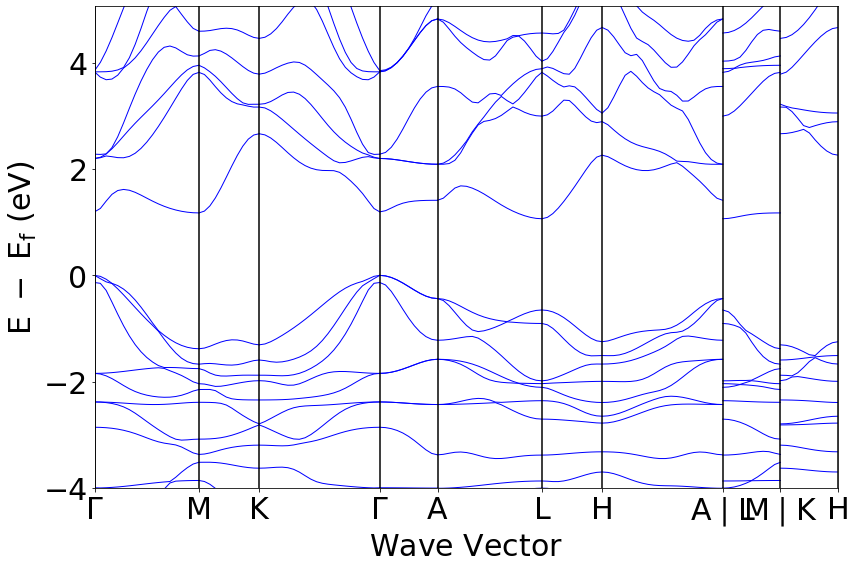

In [478]:
print('Bandes de conduction et de valence')
plotter = BSPlotter(bandStructure)
plotter.get_plot().show()

In [479]:
print('Quelques données sur la bande interdite')
print('') 

print('nombre de bandes totales:')
print(bandStructure.nb_bands)
print('')

print('energie de fermi:')
print(bandStructure.efermi)
print('')

#infos sur max de la bande de valence
print('informations sur le vbm :')
print(bandStructure.get_vbm())
print('On en déduit que la dernière bande de valence est la 18ème')
print('') 

#infos sur min de la bande de conduction
print('informations sur le cbm :')
print(bandStructure.get_cbm())
print('On en déduit que la première bande de conduction est la 19ème')
print('')

#energy of the 18th band 1st kpoint
print('Maximum de la bande de valence =',bandStructure.bands[Spin.up][18][0])  
print('')

#energy of the 19th band 82nd kpoint
print('Minium de la bande de conduction=',bandStructure.bands[Spin.up][19][82])  
print('')

Quelques données sur la bande interdite

nombre de bandes totales:
42

energie de fermi:
3.59177827

informations sur le vbm :
{'band_index': defaultdict(<class 'list'>, {<Spin.up: 1>: [17, 18]}), 'kpoint_index': [0, 52, 53], 'kpoint': <pymatgen.electronic_structure.bandstructure.Kpoint object at 0x7f4ef4e0b7f0>, 'energy': 3.5831, 'projections': {}}
On en déduit que la dernière bande de valence est la 18ème

informations sur le cbm :
{'band_index': defaultdict(<class 'list'>, {<Spin.up: 1>: [19]}), 'kpoint_index': [82, 83, 117], 'kpoint': <pymatgen.electronic_structure.bandstructure.Kpoint object at 0x7f4ef4e77ac8>, 'energy': 4.6499, 'projections': {}}
On en déduit que la première bande de conduction est la 19ème

Maximum de la bande de valence = 3.5831

Minium de la bande de conduction= 4.6499



In [480]:
#Pour récolter data concernant les bandes (energies,distances,...)
data = plotter.bs_plot_data()
distance = data.get('distances')
energy = data.get('energy')

In [481]:
#energy[intervalle].get('1')[bande][0 pour premier élément ou -1 pour dernier élement]
#distance[intervalle][0 pour premier élément ou -1 pour dernier élément]

#Différence d'energie entre la première et la dernière energie d'un intervalle dans la bande de valence
diffEnergyVal = [(energy[0].get('1')[18][-1])-(energy[0].get('1')[18][0])]
for i in range (1,9) : 
    diffEnergyVal.append((energy[i].get('1')[18][-1])-(energy[i].get('1')[18][0]))
#Différence d'energie entre la première et la dernière valeur d'un intervalle dans la bande de conduction
diffEnergyCon = [(energy[0].get('1')[19][-1])-(energy[0].get('1')[19][0])]
for n in range (1,9) : 
    diffEnergyCon.append((energy[n].get('1')[19][-1])-(energy[n].get('1')[19][0]))
#Distance des différents intervaux
diffDistance = [(distance[0][-1])-(distance[0][0])]
for j in range (1,9) : 
    diffDistance.append((distance[j][-1])-(distance[j][0]))
pentesVal = [diffEnergyVal[0]/diffDistance[0]]  
for k in range (1,9) : 
    pentesVal.append(diffEnergy[k]/diffDistance[k])
pentesCon = [diffEnergyCon[0]/diffDistance[0]]
for o in range (1,9) :
    pentesCon.append(diffEnergyCon[o]/diffDistance[o])


#trouvons la direction dans laquelle la dernière bande de valence présente le plus de dispersion 
penteMaxVal = 0 
interval1=0
for l in range (0,9) :
    if (abs(pentesVal[l]) > abs(penteMaxVal)) :
        penteMaxVal = pentes[l] 
        interval1 = l      

#trouvons la direction dans laquelle la dernière bande de valence présente le moins de dispersion
penteMinVal = pentesVal[0]
interval2=0
for m in range (0,9) :
    if (abs(pentesVal[m]) < abs(penteMinVal)) :
        penteMinVal = pentesVal[m] 
        interval2 = m

#trouvons la direction dans laquelle la première bande de conduction présente le plus de dispersion 
penteMaxCon = 0 
interval3=0
for p in range (0,9) :
    if (abs(pentesCon[p]) > abs(penteMaxCon)) :
        penteMaxCon = pentesCon[p] 
        interval3 = p
        
#trouvons la direction dans laquelle la première bande de conduction présente le moins de dispersion 
penteMinCon = pentesCon[0]
interval4=0
for q in range (0,9) :
    if (abs(pentesCon[q]) < abs(penteMinCon)) :
        penteMinCon = pentesCon[q] 
        interval3 = q

ROUGE : flèche indiquant le maximum de dispersion de la bande de valence
BLEU : flèche indiquant le minimum de dispersion bande de valence
VERT : flèche indiquant le maximum de dispersion bande de conduction
CYAN : flÈche indiquant le minimum de dispersion bande de conduction


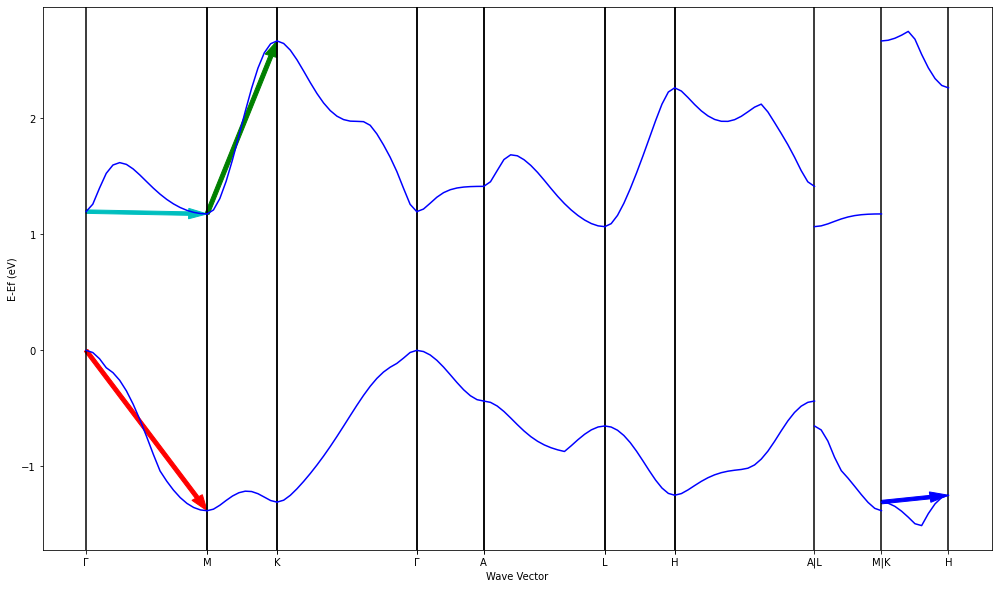

In [482]:
distanceInterval = data.get('ticks').get('distance')
fig,ax = plt.subplots(1,1,figsize=(17,10))

for i in range(len(distanceInterval)):
    plt.axvline(distanceInterval[i],0,color="black")
ax.set_xticks(distanceInterval)
ax.set_xticklabels(['\u0393',"",'M',"",'K',"",'\u0393',"",'A',"",'L',"",'H','A|L','M|K','H'])
ax.set_xlabel('Wave Vector')
ax.set_ylabel('E-Ef (eV)')


for i in range(len(distance)):
    plt.plot(distance[i],energy[i].get('1')[18],'b')
    plt.plot(distance[i],energy[i].get('1')[19],'b')
    
#fleche indiquant le maximum de dispersion bande de valence
plt.arrow(distance[interval1][0],energy[interval1].get('1')[18][0],diffDistance[interval1],diffEnergyVal[interval1],width=0.03,length_includes_head=True,color='r')

#fleche indiquant le minimum de dispersion bande de valence
plt.arrow(distance[interval2][0],energy[interval2].get('1')[18][0],diffDistance[interval2],diffEnergyVal[interval2],width=0.03,length_includes_head=True,color='b')

#fleche indiquant le maximum de dispersion bande de conduction
plt.arrow(distance[interval3][0],energy[interval3].get('1')[19][0],diffDistance[interval3],diffEnergyCon[interval3],width=0.03,length_includes_head=True,color='g')

#fleche indiquant le minimum de dispersion bande de conduction
plt.arrow(distance[interval4][0],energy[interval4].get('1')[19][0],diffDistance[interval4],diffEnergyCon[interval4],width=0.03,length_includes_head=True,color='c')


print('ROUGE : flèche indiquant le maximum de dispersion de la bande de valence')
print('BLEU : flèche indiquant le minimum de dispersion bande de valence')
print('VERT : flèche indiquant le maximum de dispersion bande de conduction')
print('CYAN : flÈche indiquant le minimum de dispersion bande de conduction')

In [483]:
#Calculons la masse effective au sommet (base) de la dernière (première) bande de valence (conduction)
#Pour se faire, il faut approximer la bande par une parabole



#Obtention parabole passant par sommet de la dernière bande de valence
ordMax = -1
absMax = 0
for i in range (0,9):
    if energy[i].get('1')[18][0] > ordMax : 
        ordMax = energy[i].get('1')[18][0]
        absMax = distance[i][0]
        y2 = energy[i].get('1')[18][2]
        y3 = energy[i].get('1')[18][4]
        x2 = distance[i][2]
        x3 = distance[i][4]
xVal=[absMax,x2,x3]
yVal=[ordMax,y2,y3]
paraboleVal = np.polyfit(xVal,yVal,2)
#Calcul masse effective au sommet de la dernière bande de valence
deriv2ndeVal = np.polyder(paraboleVal,m=2)
hBarre =6.582119570*(10**-16) #valeur en [eV*s]
massEffectiveVal = (hBarre**2)/(deriv2ndeVal)
print('La masse effective au sommet de la dernière bande de valence =',massEffectiveVal,'[kg]')


#Obtention parabole passant par la base de la première bande de conduction
ordMin = 2
absMin = 0
for i in range (1,9):
    if energy[i].get('1')[19][0] < ordMin : 
        ordMin = energy[i].get('1')[19][0]
        absMin = distance[i][0]
        y2 = energy[i].get('1')[19][2]
        y3 = energy[i].get('1')[19][4]
        x2 = distance[i][2]
        x3 = distance[i][4]
xCon=[absMin,x2,x3]
yCon=[ordMin,y2,y3]
paraboleCon = np.polyfit(xCon,yCon,2)
#Calcul masse effective passant par la base de la bande de conduction
deriv2ndeCon = np.polyder(paraboleCon,m=2)
hBarre =6.582119570*(10**-16) #valeur en [eV*s]
massEffectiveCon = (hBarre**2)/(deriv2ndeCon)
print('La masse effective à la base de la première bande de conduction=',massEffectiveCon,'[kg]')

La masse effective au sommet de la dernière bande de valence = [-8.74814442e-32] [kg]
La masse effective à la base de la première bande de conduction= [2.8356012e-32] [kg]


En rouge, on peut voir le maximum/minimum de la bande de valence/conduction
En vert, on peut voir les paraboles qui approximent les bandes de valence/conduction en leur max/min


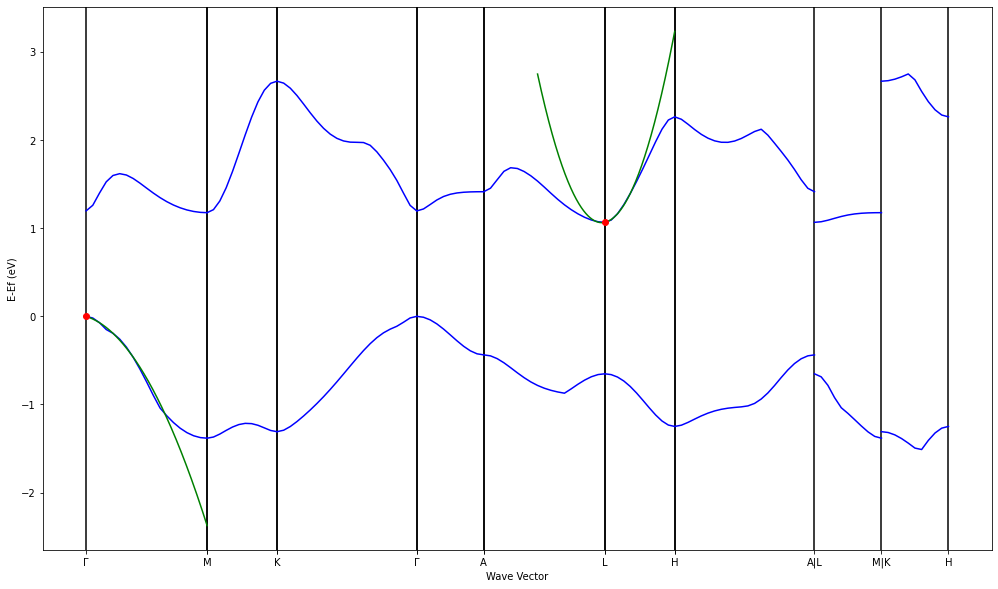

In [484]:
#Verification parabole
distanceInterval = data.get('ticks').get('distance')
fig,ax = plt.subplots(1,1,figsize=(17,10))

for i in range(len(distanceInterval)):
    plt.axvline(distanceInterval[i],0,color="black")
ax.set_xticks(distanceInterval)
ax.set_xticklabels(['\u0393',"",'M',"",'K',"",'\u0393',"",'A',"",'L',"",'H','A|L','M|K','H'])
ax.set_xlabel('Wave Vector')
ax.set_ylabel('E-Ef (eV)')

for j in range(len(distance)):
    plt.plot(distance[j],energy[j].get('1')[18],'b')
    plt.plot(distance[j],energy[j].get('1')[19],'b')
#parabole passant par le sommet de la dernière bande de valence
interval = np.linspace(distance[0][0],distance[1][0],1000)
plt.plot(interval, np.polyval(paraboleVal,interval), 'g')
#maximum de la bande de valence
plt.plot(absMax,ordMax,'o',color = 'r') 
#parabole passant par la base de la première bande conduction
interval = np.linspace(distance[4][8],distance[6][0],1000)
plt.plot(interval, np.polyval(paraboleCon,interval), 'g')
#minimum de la bande de conduction
plt.plot(absMin,ordMin,'o',color = 'r') 
print('En rouge, on peut voir le maximum/minimum de la bande de valence/conduction')
print('En vert, on peut voir les paraboles qui approximent les bandes de valence/conduction en leur max/min')
#sur ce plot j'ai decidé ne représenter qu'un max et min ceux que j'ai utilisés pour faire l'approximation avec les paraboles, pour en avoir la totalité, cf dernière image

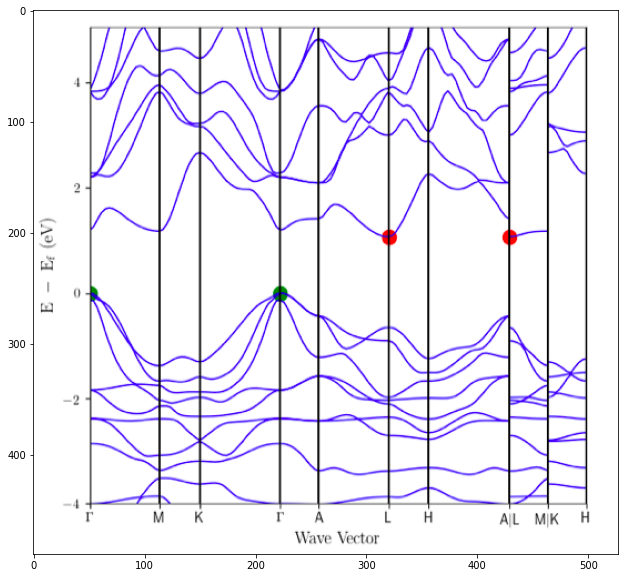

In [485]:
#représentation des bandes de valence/conduction avec tous les max/min
#image provenant de materials project
plt.figure(figsize = (20,10))
plt.imshow(img.imread('BandStructure.png'))
plt.show()